In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [45]:
def plot_rewards(rewards_means, non_opt_rewards, x_coords, file_name, markevery=5):
    plt.rc('text', usetex=True)
    plt.rc('text.latex', preamble=r'\usepackage{amsfonts}')
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4.5))
    plt.rcParams.update({'font.size': 12})

    # ylims = (0, 920)

    # Plot Rewards
    ax.plot(np.array(x_coords),
               rewards_means, label=r"PPO $\pi_{\theta}$", marker="o", ls='-', color="r",
               markevery=markevery)
    
    #ax.plot(np.array(x_coords),
    #           non_opt_rewards, label="Non-Optimized Env", marker="s", ls='-', color="#661D98",
    #           markevery=markevery)
    optimal_reward = 50
    ax.plot(np.array(x_coords),
               [optimal_reward] * len(x_coords), label=r"$\pi^{*}$",
               color="black",
               linestyle="dashed")
    ax.fill_between(np.array(x_coords),
                       rewards_means, [optimal_reward] * len(x_coords),
                       alpha=0.35, color="#599ad3")

    ax.set_title("Episodic Rewards")
    ax.set_xlabel("\# Iteration", fontsize=20)
    ax.set_ylabel("Avg Episode Reward", fontsize=20)
    ax.set_xlim(0, len(x_coords))
    # ax[0].set_ylim(0, 0.75)

    # set the grid on
    ax.grid('on')

    # tweak the axis labels
    xlab = ax.xaxis.get_label()
    ylab = ax.yaxis.get_label()

    xlab.set_size(10)
    ylab.set_size(10)

    # change the color of the top and right spines to opaque gray
    ax.spines['right'].set_color((.8, .8, .8))
    ax.spines['top'].set_color((.8, .8, .8))

    #ax.legend(loc="lower right")

    ax.xaxis.label.set_size(13.5)
    ax.yaxis.label.set_size(13.5)
    
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18),
              ncol=3, fancybox=True, shadow=True)

    # ax[0].set_ylim(0, 1)
    # ax[1].set_ylim(0, 1)
    # ax[2].set_ylim(0, 1)

    fig.tight_layout()
    plt.show()
    # plt.subplots_adjust(wspace=0, hspace=0)
    #fig.savefig(file_name + ".png", format="png", dpi=600)
    fig.savefig(file_name + ".pdf", format='pdf', dpi=600, bbox_inches='tight', transparent=True)
    #plt.close(fig)

In [31]:
def plot_rewards_2(rewards_means, non_opt_rewards, x_coords, file_name, markevery=5):
    plt.rc('text', usetex=True)
    plt.rc('text.latex', preamble=r'\usepackage{amsfonts}')
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4.5))
    plt.rcParams.update({'font.size': 12})

    # ylims = (0, 920)

    # Plot Rewards
    #ax.plot(np.array(x_coords),
    #           rewards_means, label="Optimized Env", marker="o", ls='-', color="r",
    #           markevery=markevery)
    
    ax.plot(np.array(x_coords),
               non_opt_rewards, label=r"PPO $\pi_{\theta}$", marker="s", ls='-', color="#661D98",
               markevery=markevery)
    optimal_reward = 50
    ax.plot(np.array(x_coords),
               [optimal_reward] * len(x_coords), label=r"$\pi^{*}$",
               color="black",
               linestyle="dashed")
    ax.fill_between(np.array(x_coords),
                       non_opt_rewards, [optimal_reward] * len(x_coords),
                       alpha=0.35, color="#599ad3")

    ax.set_title("Episodic Rewards")
    ax.set_xlabel("\# Hours training", fontsize=20)
    ax.set_ylabel("Avg Episode Reward", fontsize=20)
    ax.set_xlim(0, max(x_coords))
    # ax[0].set_ylim(0, 0.75)

    # set the grid on
    ax.grid('on')

    # tweak the axis labels
    xlab = ax.xaxis.get_label()
    ylab = ax.yaxis.get_label()

    xlab.set_size(10)
    ylab.set_size(10)

    # change the color of the top and right spines to opaque gray
    ax.spines['right'].set_color((.8, .8, .8))
    ax.spines['top'].set_color((.8, .8, .8))

    #ax.legend(loc="lower right")

    ax.xaxis.label.set_size(13.5)
    ax.yaxis.label.set_size(13.5)
    
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18),
              ncol=3, fancybox=True, shadow=True)

    # ax[0].set_ylim(0, 1)
    # ax[1].set_ylim(0, 1)
    # ax[2].set_ylim(0, 1)

    fig.tight_layout()
    plt.show()
    # plt.subplots_adjust(wspace=0, hspace=0)
    #fig.savefig(file_name + ".png", format="png", dpi=600)
    fig.savefig(file_name + ".pdf", format='pdf', dpi=600, bbox_inches='tight', transparent=True)
    #plt.close(fig)

In [57]:
df = pd.read_csv("/home/kim/storage/workspace/pycr/python-envs/minigames/network_intrusion/ctf/gym-pycr-ctf/examples/difficulty_level_3/training/v1/emulation/ppo_baseline/results/data/0/1606226295.8657658_train_results_checkpoint.csv")

In [58]:
dfs = [df]
rewards_data_1 = list(map(lambda df: df["eval_avg_episode_rewards"].values, dfs))
rewards_means_1 = np.mean(tuple(rewards_data_1), axis=0)
rewards_stds_1 = np.std(tuple(rewards_data_1), axis=0, ddof=1)

In [59]:
len(rewards_means_1)

500

In [9]:
x_coords = []
max_coord = 3
step = float(float(max_coord)/float(len(rewards_means_1)))
for i in range(len(rewards_means_1)):
    x_coords.append(float(i)*step)
   # x_coords.append((float(i)*step)/float(max_coord)

In [28]:
rewards_means_1

array([ 9.589041, 16.883118, 65.60345 , 72.20473 , 77.07692 , 83.671875,
       85.8042  , 85.37313 , 86.18644 , 87.79412 , 88.8806  , 89.210526,
       89.0411  , 89.477615, 89.06475 , 88.87324 , 89.63504 , 88.965515,
       89.30769 , 89.42446 , 89.172935, 89.565216, 89.58904 , 90.      ,
       89.338234, 89.541985, 89.236115, 89.166664, 89.26471 , 89.37063 ,
       89.202896, 89.79592 , 89.591835, 89.92593 , 89.72028 , 89.13333 ,
       89.31035 , 89.23664 , 89.30556 , 89.31507 , 89.32886 , 89.338234,
       89.318184, 88.95105 , 89.111115, 89.31035 , 89.79592 , 89.92958 ,
       90.      , 89.338234])

In [62]:
rewards_means_2 = []
for i in range(len(rewards_means_1)):
    if rewards_means_1[i] <= 50:
        rewards_means_2.append(rewards_means_1[i])
    else:
        rewards_means_2.append(50)
rewards_means_1 = rewards_means_2

In [52]:
non_caching_means = []
base_rew = 9.59041
step = 0.05
for i in range(len(rewards_means_1)):
    non_caching_means.append(base_rew + i*step + (np.random.sample(1)[0]))

In [64]:
rewards_means_1 = np.array([-250, -240, -230, -250, -255, -260, -200, -254, -251, -258, -250, -240, -230, -250, -250, -240, -230, -250] + list(rewards_means_1))

In [60]:
plot_rewards(rewards_means_1, non_caching_means, x_coords, "opt_env_vs_non_opt")

NameError: name 'non_caching_means' is not defined

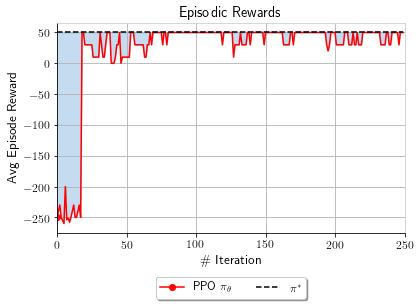

In [66]:
plot_rewards(rewards_means_1[0:250], None, list(range(len(rewards_means_1)))[0:250], 
             "upsilon_3_rewards_v1", markevery=1000)

In [25]:
max(rewards_means_1)

50.0

In [12]:
rewards_means_1

array([-78.57143 , -40.666668,  24.038462, ...,  25.490196,  25.76923 ,
        27.058823])

In [13]:
plot_rewards_2(rewards_means_1, non_caching_means, x_coords, "non_opt_regret")

NameError: name 'non_caching_means' is not defined

In [44]:
np.random.sample(1)

array([0.68041751])

In [2]:
import numpy as np
from scipy.optimize import curve_fit

def powlaw(x, a, b) :
    return a * np.power(x, b)
def linlaw(x, a, b) :
    return a + x * b

def curve_fit_log(xdata, ydata) :
    """Fit data to a power law with weights according to a log scale"""
    # Weights according to a log scale
    # Apply fscalex
    xdata_log = np.log10(xdata)
    # Apply fscaley
    ydata_log = np.log10(ydata)
    # Fit linear
    popt_log, pcov_log = curve_fit(linlaw, xdata_log, ydata_log)
    #print(popt_log, pcov_log)
    # Apply fscaley^-1 to fitted data
    ydatafit_log = np.power(10, linlaw(xdata_log, *popt_log))
    # There is no need to apply fscalex^-1 as original data is already available
    return (popt_log, pcov_log, ydatafit_log)

(array([ 7.13660257e-05, -2.44129815e+06,  2.44328680e+06]), array([[ 8.52170392e-03,  2.91694875e+08, -2.91694932e+08],
       [ 2.91694875e+08,  9.98461147e+18, -9.98461340e+18],
       [-2.91694932e+08, -9.98461340e+18,  9.98461533e+18]]))
[[ 8.52170392e-03  2.91694875e+08 -2.91694932e+08]
 [ 2.91694875e+08  9.98461147e+18 -9.98461340e+18]
 [-2.91694932e+08 -9.98461340e+18  9.98461533e+18]]


ValueError: could not broadcast input array from shape (3,3) into shape (3)

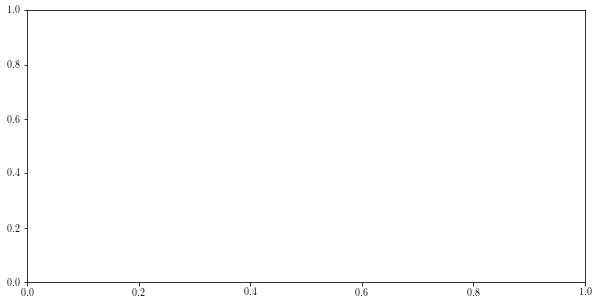

In [92]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

df = pd.DataFrame({
            'x': [ 1000, 3250, 5500, 10000, 32500, 55000, 77500, 100000, 200000 ],
            'y': [ 1100, 500, 288, 200, 113, 67, 52, 44, 5 ]
        })
#df.plot(x='x', y='y', kind='line', style='--ro', figsize=(10, 5))

x = np.asarray([ 1000, 3250, 5500, 10000, 32500, 55000, 77500, 100000, 200000 ])
y = np.asarray([ 1100, 500, 288, 200, 113, 67, 52, 44, 5 ])

sol1 = curve_fit(func_powerlaw, x, y, maxfev=2000 )
sol2 = curve_fit(func_powerlaw, x, y, p0 = np.asarray([-1,10**5,0]))

print(sol1)

def func_powerlaw(x, m, c, c0):
    return c0 + x**m * c

target_func = func_powerlaw

X = df['x']
y = df['y']

#popt, pcov = curve_fit(target_func, X, y)

#popt, pcov = curve_fit_log(X, y)

plt.figure(figsize=(10, 5))
#plt.plot(X, target_func(X, *popt), '--')
#plt.plot(X, y, 'ro')
print(sol1[1])
plt.plot(X, sol1)
plt.legend()
plt.show()

In [3]:
import numpy as np
import zipfile
import matplotlib.pyplot as plt
from scipy import *
from gym_pycr_ctf.envs.config.simple.pycr_ctf_simple_base import PyCrctfSimpleBase
from gym_pycr_ctf.dao.action.action_type import ActionType


def read_action_costs(zip_file: str, num_bins = 100):
    archive = zipfile.ZipFile(zip_file, 'r')
    files = archive.namelist()
    cost_files = list(filter(lambda x: "_cost.txt" in x, files))
    print("num cost_files:{}".format(len(cost_files)))
    costs  = []
    for cf in cost_files:
        cost_txt = archive.read(cf)
        try:
            cost=float(cost_txt.decode().replace("\n",""))
            costs.append(cost)
        except:
            pass
    bins = np.linspace(min(costs), max(costs), num_bins)
    digitized = np.digitize(costs, bins)
    return digitized

In [4]:
d_1 = read_action_costs(
        zip_file="/home/kim/storage/workspace/pycr/emulation-envs/minigames/network_intrusion/ctf/001/level_2/agent_cache.zip",
        num_bins=100)
d_2 = read_action_costs(
        zip_file="/home/kim/storage/workspace/pycr/emulation-envs/minigames/network_intrusion/ctf/001/level_2/ssh1_cache.zip",
        num_bins=100)
d_3 = read_action_costs(
        zip_file="/home/kim/storage/workspace/pycr/emulation-envs/minigames/network_intrusion/ctf/001/level_2/ssh2_cache.zip",
        num_bins=100)
d_4 = read_action_costs(
        zip_file="/home/kim/storage/workspace/pycr/emulation-envs/minigames/network_intrusion/ctf/001/level_2/ssh3_cache.zip",
        num_bins=100)
d_5 = read_action_costs(
        zip_file="/home/kim/storage/workspace/pycr/emulation-envs/minigames/network_intrusion/ctf/001/level_2/telnet1_cache.zip",
        num_bins=100)
d_6 = read_action_costs(
        zip_file="/home/kim/storage/workspace/pycr/emulation-envs/minigames/network_intrusion/ctf/001/level_2/telnet2_cache.zip",
        num_bins=100)
d_7 = read_action_costs(
        zip_file="/home/kim/storage/workspace/pycr/emulation-envs/minigames/network_intrusion/ctf/001/level_2/telnet3_cache.zip",
        num_bins=100)
d_15 = read_action_costs(
        zip_file="/home/kim/storage/workspace/pycr/emulation-envs/minigames/network_intrusion/ctf/001/level_1/agent_cache.zip",
        num_bins=100)
    #print(d_1.shape)
total = list(d_1) + list(d_2) + list(d_3) + list(d_4) + list(d_5) + list(d_6) + list(d_7) + list(d_15)

num cost_files:1003
num cost_files:979
num cost_files:1190
num cost_files:873
num cost_files:932
num cost_files:795
num cost_files:579
num cost_files:152


In [5]:
y = total
x = list(range(len(y)))

In [24]:
from pylab import *
from scipy import *
from scipy import optimize

powerlaw = lambda x, amp, index: amp * (x**index)
num_points = 20

xdata = linspace(1.1, 10.1, num_points) 
ydata = powerlaw(xdata, 10.0, -2.0)     # simulated perfect data
yerr = 0.2 * ydata                      # simulated errors (10%)
ydata += randn(num_points) * yerr       # simulated noisy data

In [12]:
from collections import Counter

In [13]:
g = dict(Counter(y))

In [14]:
m = max(y)

In [15]:
l = min(y)

In [16]:
l

1

In [18]:
y_2 = []
for i in range(l, m):
    if i in g:
        y_2.append(g[i])
    else:
        y_2.append(0)

In [21]:
#y_2
x_2 = list(range(l,m))

In [36]:
import seaborn as sns

In [48]:
d = np.array([x_2, y_2]).reshape(99,2)

In [49]:
data = pd.DataFrame(d, columns=['x', 
                      'y'])

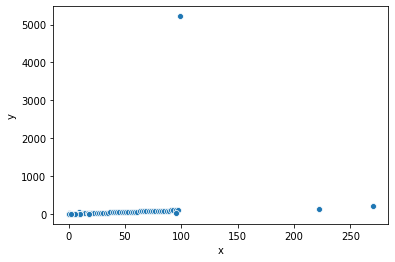

In [50]:
sns.scatterplot(data=data, x="x", y="y")

In [25]:
ydata

array([8.34408665, 3.49091331, 2.27651825, 1.786648  , 1.36272133,
       0.62757052, 0.75283403, 0.42215321, 0.46250862, 0.31668412,
       0.25647203, 0.25538141, 0.29267762, 0.26331546, 0.13046633,
       0.11174702, 0.13880596, 0.15456608, 0.12036042, 0.08706877])

In [26]:
xdata

array([ 1.1       ,  1.57368421,  2.04736842,  2.52105263,  2.99473684,
        3.46842105,  3.94210526,  4.41578947,  4.88947368,  5.36315789,
        5.83684211,  6.31052632,  6.78421053,  7.25789474,  7.73157895,
        8.20526316,  8.67894737,  9.15263158,  9.62631579, 10.1       ])

In [27]:
ydata = y_2
xdata = x_2

In [30]:
yerr = np.zeros(len(ydata))

/home/kim/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


[ 1. -1.]
None


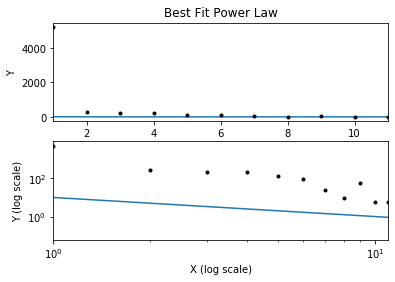

In [34]:
logx = log10(xdata)
logy = log10(ydata)
logyerr=yerr
#logyerr = yerr / ydata

# define our (line) fitting function
fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err

pinit = [1.0, -1.0]
out = optimize.leastsq(errfunc, pinit,
                       args=(logx, logy, yerr), full_output=1)

pfinal = out[0]
covar = out[1]
print(pfinal)
print(covar)

index = pfinal[1]
amp = 10.0**pfinal[0]

#indexErr = sqrt( covar[0][0] )
#ampErr = sqrt( covar[1][1] ) * amp

##########
# Plotting data
##########

clf()
subplot(2, 1, 1)
plot(xdata, powerlaw(xdata, amp, index))     # Fit
errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
#text(5, 6.5, 'Ampli = %5.2f +/- %5.2f' % (amp, ampErr))
#text(5, 5.5, 'Index = %5.2f +/- %5.2f' % (index, indexErr))
title('Best Fit Power Law')
xlabel('X')
ylabel('Y')
xlim(1, 11)

subplot(2, 1, 2)
loglog(xdata, powerlaw(xdata, amp, index))
errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
xlabel('X (log scale)')
ylabel('Y (log scale)')
xlim(1.0, 11)

savefig('power_law_fit.png')
